# The Hong Kong University of Science and Technology
# MSBD5002: Data Mining and Knowledge Discovery
# Fall 2021 Assignment 4 Question 3

### Student name: Mak Chun Wai, Michael
### HKUST account: cwmakah
### Student ID: 20801333

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import floor
from collections import defaultdict

In [2]:
with open('./Assignment4-1/Nested_Points.txt') as f:
    tmp_lines = f.readlines()
new_lines = []
for line in tmp_lines:
    line = line.replace('\n', '')
    line = list(line.split(" "))
    new_lines.append(line)
# Correct the format
lines = []
for line in new_lines:
    tmp = []
    for number in line:
        tmp.append(float(number))
    lines.append(tuple(tmp))

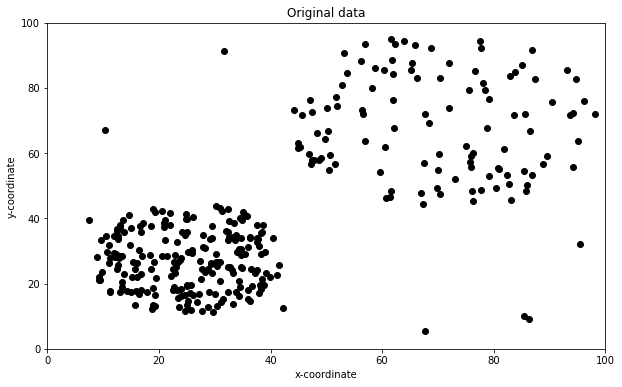

In [3]:
plt.figure(figsize=(10,6))
# Plot points
x = []
y = []
for idx in range(len(lines)):
    x.append(lines[idx][0])
    y.append(lines[idx][1])
plt.scatter(x, y, color = 'black')
# Set up the plot
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Original data')
plt.show()

In [4]:
def get_dist(pt1, pt2):
    a = np.array(pt1)
    b = np.array(pt2)
    return np.linalg.norm(a - b)

In [5]:
thres_dist = 10
thres_count = 4

In [6]:
non_outliers = lines
outliers = []
for point_one in lines:
    count = 0
    outlier_bool = True
    for point_two in lines:
        if point_one != point_two and get_dist(point_one, point_two) <= thres_dist:
            count += 1
        if count >= thres_count:
            outlier_bool = False
            break
    if outlier_bool:
        outliers.append(point_one)
        non_outliers.remove(point_one)

In [7]:
len(outliers)

6

In [8]:
len(non_outliers)

321

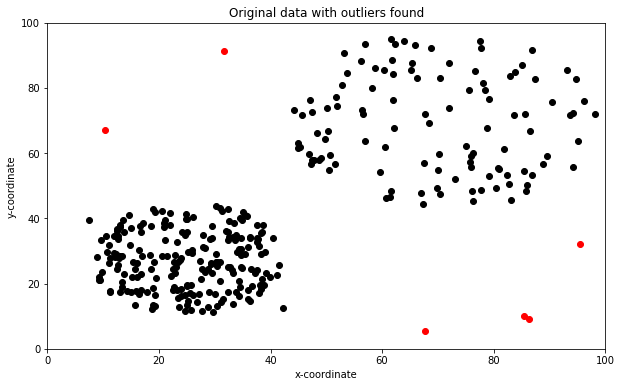

In [9]:
plt.figure(figsize=(10,6))
# Plot non_outliers
x = []
y = []
for idx in range(len(non_outliers)):
    x.append(non_outliers[idx][0])
    y.append(non_outliers[idx][1])
plt.scatter(x, y, color = 'black')
# Plot non_outliers
x = []
y = []
for idx in range(len(outliers)):
    x.append(outliers[idx][0])
    y.append(outliers[idx][1])
plt.scatter(x, y, color = 'red')
# Set up the plot
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Original data with outliers found')
plt.show()

In [10]:
outliers

[(85.42510121, 10.0),
 (10.25641026, 66.95652174),
 (31.71390013, 91.15942029),
 (67.7462888, 5.362318841),
 (95.41160594, 32.02898551),
 (86.23481781, 9.130434783)]